In [ ]:
import json
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print('학습용 데이터 개수:', len(glob.glob('/content/drive/MyDrive/Colab Notebooks/sia/dacon-arirang-master/data/train/images/*')))
print('학습용 라벨 개수:', len(glob.glob('/content/drive/MyDrive/Colab Notebooks/sia/dacon-arirang-master/data/train/json/*')))
print('시험용 데이터 개수:', len(glob.glob('/content/drive/MyDrive/Colab Notebooks/sia/dacon-arirang-master/data/test/images/*')))


학습용 데이터 개수: 800
학습용 라벨 개수: 800
시험용 데이터 개수: 100


In [ ]:
import pandas as pd

def readJSON(path):
    '''
    Parameters:
    ----------
    path: path to json file
    
    Returns:
    -------
    dict
        dict type of the json file
    '''
    with open(path) as f:
        data = json.load(f)
    
    return data

def getTypeName(dic):
    '''
    Parameters:
    -----------
    dic: result of readJSON
    
    Returns:
    --------
    pd.DataFrame
        dataframe with image_id as index and number of each objects contained in the image as values
    '''
    
    output = {}
    image_id = dic['features'][0]['properties']['image_id']
    
    for i in range(len(dic['features'])):
        
        type_name = dic['features'][i]['properties']['type_name']
        
        if output.get(type_name) == None :
            output[type_name] = 1
            
        else :
            output[type_name] += 1
            
    return pd.DataFrame(output, index = [image_id])

In [ ]:
%%time

total_df = pd.DataFrame()

for path in train_labels:
    
    total_df = pd.concat([total_df, getTypeName(readJSON(path))], axis = 0, join = 'outer')
    
total_df.fillna(0, inplace = True)

CPU times: user 4.96 s, sys: 406 ms, total: 5.37 s
Wall time: 2min 56s


In [ ]:
total_df

,military aircraft,truck,small car,small ship,bus,train,bridge,athletic field,crane,large ship,etc,roundabout,oil tank,helipad,civilian aircraft,dam
OBJ03565_PS3_K3A_NIA0150.png,2.0,12.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ02314_PS3_K3_NIA0118.png,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04198_PS3_K3_NIA0278.png,0.0,332.0,59.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ01701_PS3_K3_NIA0102.png,0.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04694_PS3_K3A_NIA0312.png,0.0,7.0,36.0,0.0,2.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OBJ05076_PS3_K3A_NIA0331.png,0.0,2.0,290.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ03777_PS3_K3A_NIA0158.png,0.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ03820_PS3_K3A_NIA0159.png,0.0,17.0,418.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
OBJ04295_PS3_K3_NIA0279.png,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_df.sum().sort_values()

dam                      3.0
athletic field          40.0
bridge                  93.0
roundabout             131.0
helipad                135.0
crane                  260.0
large ship             306.0
civilian aircraft      424.0
etc                    853.0
oil tank               868.0
military aircraft      937.0
bus                   3840.0
train                 5123.0
small ship           13107.0
truck                19011.0
small car            86305.0
dtype: float64

In [ ]:
print('훈련셋 내에 총 object 개수:', total_df.sum().sum())
total_df.sum().sort_values() / total_df.sum().sum()

훈련셋 내에 총 object 개수: 131436.0


dam                  0.000023
athletic field       0.000304
bridge               0.000708
roundabout           0.000997
helipad              0.001027
crane                0.001978
large ship           0.002328
civilian aircraft    0.003226
etc                  0.006490
oil tank             0.006604
military aircraft    0.007129
bus                  0.029216
train                0.038977
small ship           0.099722
truck                0.144641
small car            0.656631
dtype: float64

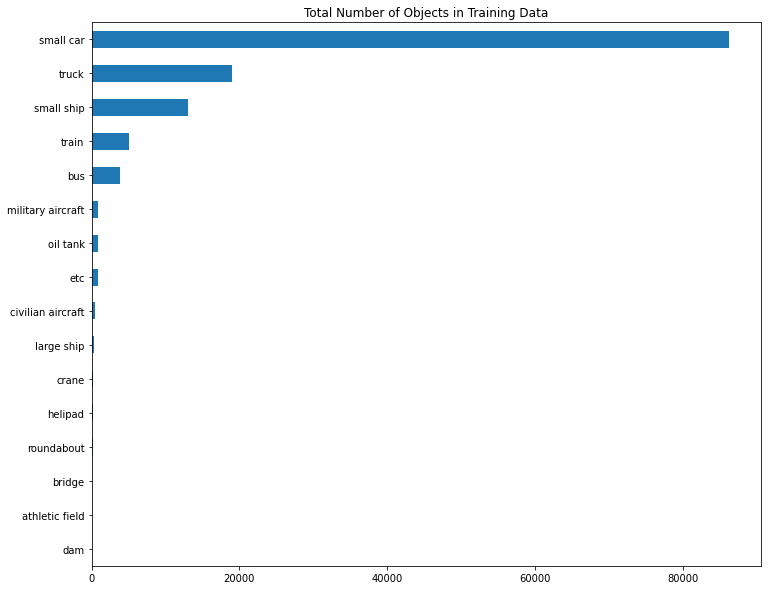

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
total_df.sum().sort_values().plot(kind = 'barh', title = 'Total Number of Objects in Training Data')

In [ ]:
# train label 경로 저장
train_labels = glob.glob('/content/drive/MyDrive/Colab Notebooks/sia/dacon-arirang-master/data/train/json/*')

In [ ]:
import pandas as pd

df2 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/sia/validate_objects_labeling/OBJ00743_PS3_K3_NIA0088.json')
df2.head()

,features,type
0,"{'geometry': {'coordinates': [[-47.6959534813,...",FeatureCollection
1,"{'geometry': {'coordinates': [[-47.6959534813,...",FeatureCollection
2,"{'geometry': {'coordinates': [[-47.6959534813,...",FeatureCollection
3,"{'geometry': {'coordinates': [[-47.6959534813,...",FeatureCollection
4,"{'geometry': {'coordinates': [[-47.6959534813,...",FeatureCollection


In [ ]:
import json
import glob
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/gdrive', force_remount=False)
train_path = '/gdrive/My Drive/Colab Notebooks/sia/train_objects_labeling/'
test_path = '/gdrive/My Drive/Colab Notebooks/sia/validate_objects_labeling/'
files = glob.glob(train_path+"labelTxt/*.json")
ipathes = []
cnames = []
x1s = []
x2s = []
y1s = []
y2s = []
mapi = {}
for f in files:
  with open(f,'r') as first_json:
    f_json = json.load(first_json)
    for feature in f_json['features']:
      mapi[cname]=tid
      tid = feature['properties']['type_id']
      cname = feature['properties']['type_name']
      ipath = 'images/'+feature['properties']['image_id']
      x1,y1,x2,y2,x3,y3,x4,y4 = list(map(int,list(map(float,feature['properties']['object_imcoords'].split(',')))))
      x_1,y_1 = min(x1,x3),min(y1,y3)
      x_2,y_2 = max(x1,x3),max(y1,y3)
      if x_1 == x_2 :
        x_2 +=1
      if y_1 == y_2 :
        y_2 +=1
      ipathes.append(ipath)
      cnames.append(cname)
      x1s.append(x_1)
      x2s.append(x_2)
      y1s.append(y_1)
      y2s.append(y_2)

df = pd.DataFrame({"path":ipathes,"x1":x1s,"y1":y1s,"x2":x2s,"y2":y2s,"class_name":cnames})
df.to_csv("/gdrive/My Drive/Colab Notebooks/sia/submission.csv",header=False,index=False)


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
sorted_map = sorted(mapi.items(),key=lambda x:int(x[1]))

In [ ]:
for elem in sorted_map:
  print(elem[0]+','+elem[1])


In [ ]:
print(files)

[]
